# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline

# Load Data

In [3]:
current_dir = Path('.').resolve()

In [4]:
file_path = current_dir / 'data/prediction.csv'

In [5]:
df = pd.read_csv(file_path, parse_dates=[0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 0 to 10836
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        10837 non-null  datetime64[ns]
 1   Production  10837 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.5 KB


In [7]:
df.head()

,Time,Production
0,2022-01-02 14:15:00,1954.666673
1,2022-01-02 14:30:00,2309.333426
2,2022-01-02 14:45:00,12375.333480
3,2022-01-02 15:00:00,0.000000
4,2022-01-02 15:15:00,0.000000


# Resampling

No need for resampling.

# Time Series Visualization

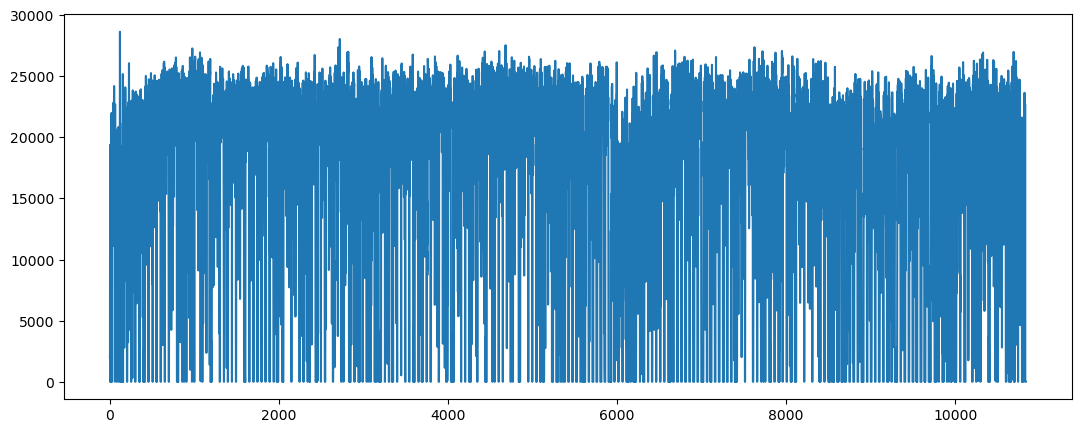

In [8]:
plt.figure(figsize=(13, 5))
df['Production'].plot()
plt.show()

In [9]:
vz = df.copy()

In [10]:
vz.index = vz['Time']

In [11]:
vz.head()

,Time,Production
Time,,
2022-01-02 14:15:00,2022-01-02 14:15:00,1954.666673
2022-01-02 14:30:00,2022-01-02 14:30:00,2309.333426
2022-01-02 14:45:00,2022-01-02 14:45:00,12375.333480
2022-01-02 15:00:00,2022-01-02 15:00:00,0.000000
2022-01-02 15:15:00,2022-01-02 15:15:00,0.000000


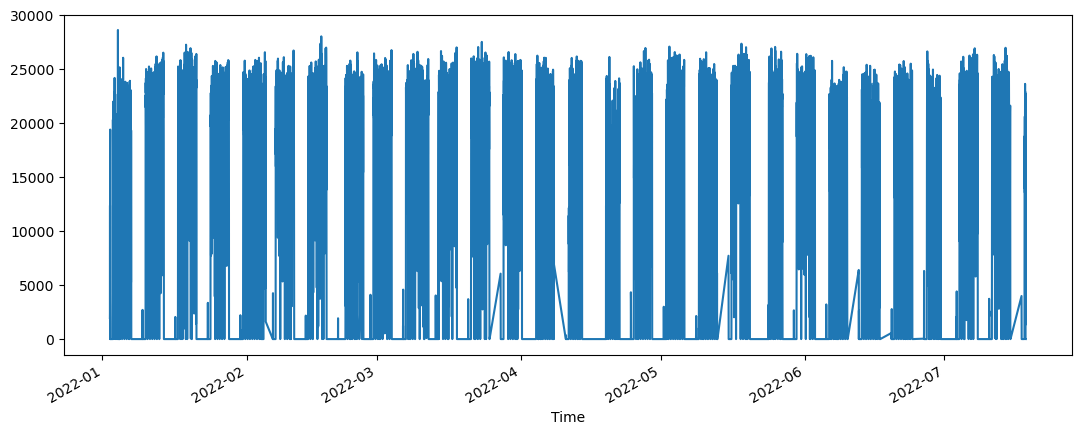

In [12]:
plt.figure(figsize=(13, 5))
vz['Production'].plot()
plt.show()

## Zoom In

In [13]:
vz2 = vz[(vz['Time'] > '2022-01-01') & (vz['Time'] <= '2022-01-08')].copy()

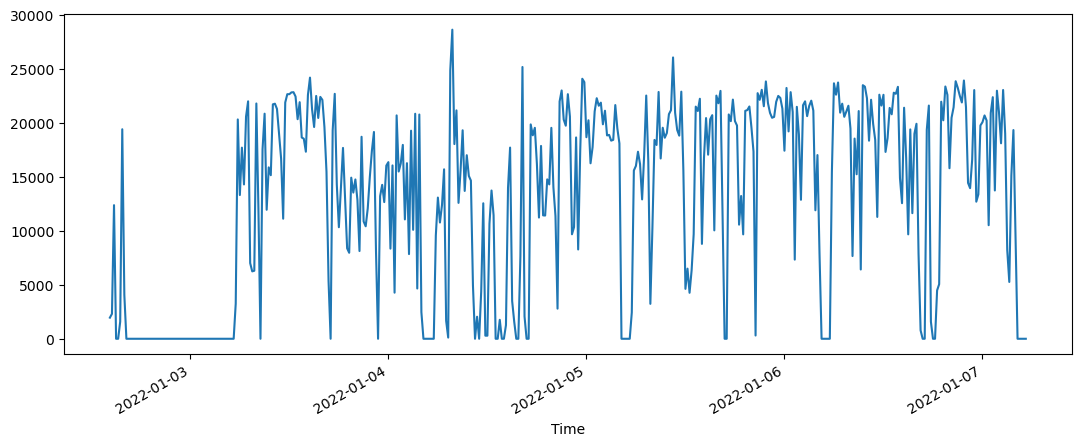

In [14]:
plt.figure(figsize=(13, 5))
vz2['Production'].plot()
plt.show()

## Trendline

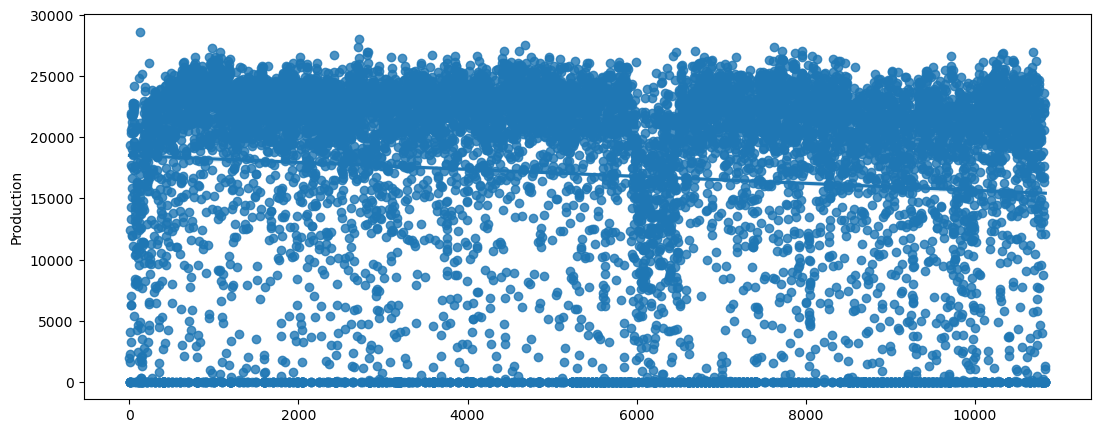

In [15]:
plt.figure(figsize=(13, 5))
sns.regplot(x=df.index.values, y=df['Production'])
plt.show()

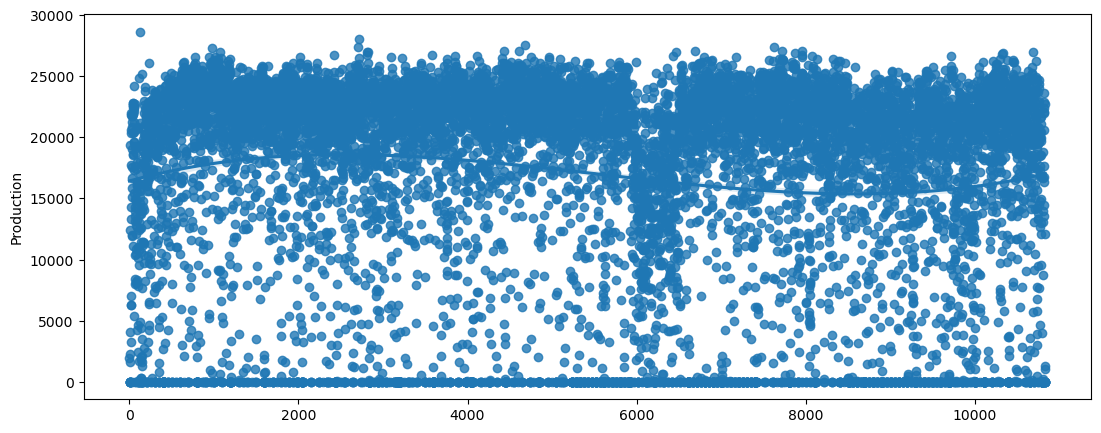

In [16]:
plt.figure(figsize=(13, 5))
sns.regplot(x=df.index.values, y=df['Production'], order=3)
plt.show()

## Remove Seasonality

In [17]:
df['Month'] = df['Time'].dt.month

In [19]:
df.head()

,Time,Production,Month
0,2022-01-02 14:15:00,1954.666673,1
1,2022-01-02 14:30:00,2309.333426,1
2,2022-01-02 14:45:00,12375.333480,1
3,2022-01-02 15:00:00,0.000000,1
4,2022-01-02 15:15:00,0.000000,1


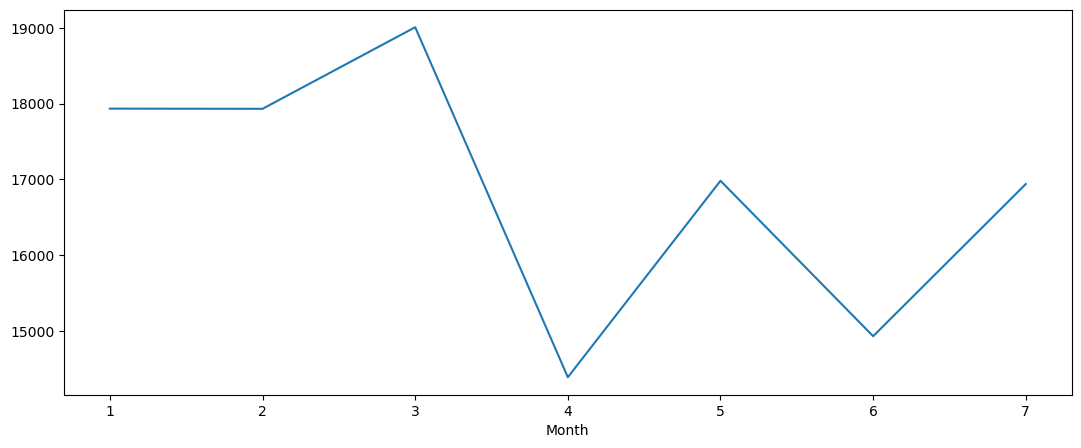

In [20]:
plt.figure(figsize=(13, 5))
df.groupby('Month')['Production'].mean().plot()
plt.show()

In [21]:
df['Day'] = df['Time'].dt.day

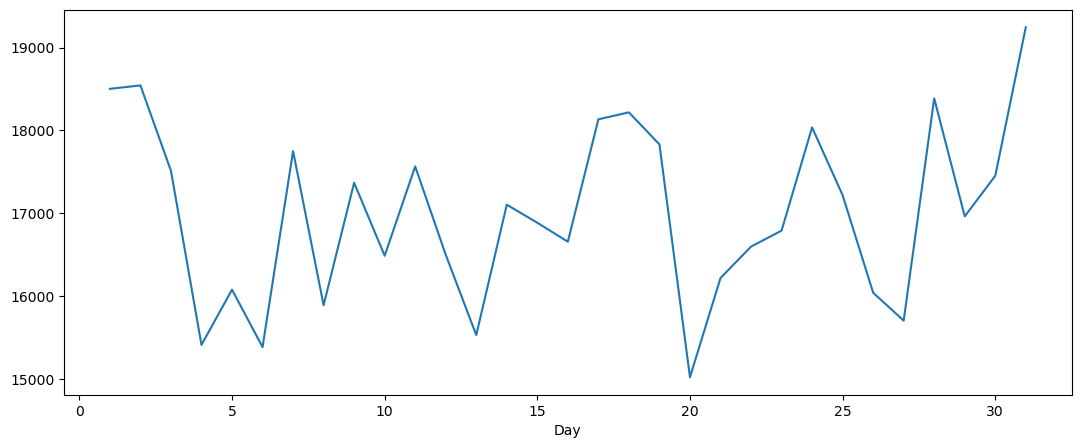

In [22]:
plt.figure(figsize=(13, 5))
df.groupby('Day')['Production'].mean().plot()
plt.show()

## Create Lag Plot

In [23]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

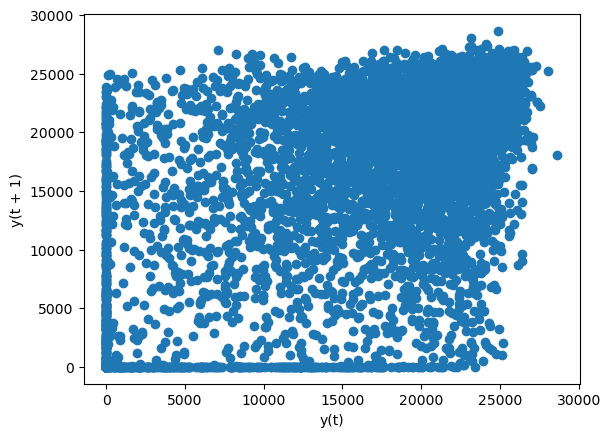

In [24]:
lag_plot(df['Production'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

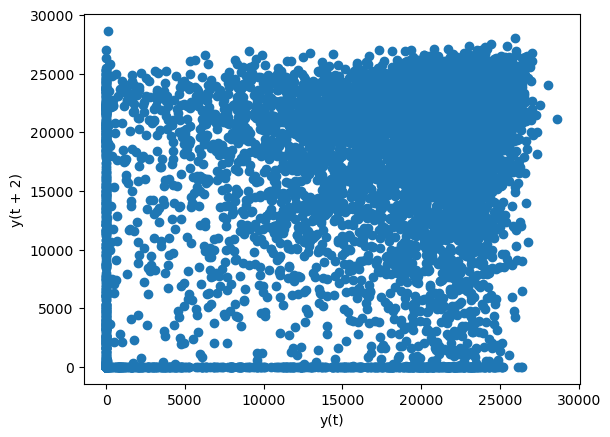

In [25]:
lag_plot(df['Production'], lag=2)

## Autocorrelation Plot

In [26]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

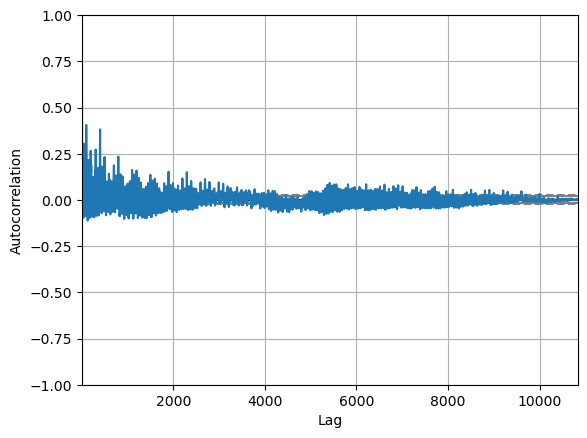

In [28]:
autocorrelation_plot(df['Production'])

# Decomposing Time Series

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
df.index = df['Time']

In [32]:
df = df.set_index('Time').asfreq('15T')

In [36]:
df.isnull().sum()

Production    8068
Month         8068
Day           8068
dtype: int64

In [33]:
result = seasonal_decompose(df['Production'], model='additive')

ValueError: This function does not handle missing values

In [ ]:
df.head()

In [ ]:
df.index

In [34]:
# check the frequency of the data
print(df.index.freq, df['Time'].dt.freq)

KeyError: 'Time'

In [ ]:
def add_freq(idx, freq=None):
    """
    Add a frequency attribute to idx, through inference or directly.
    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [ ]:
idx=pd.to_datetime(['2022-01-02 14:15:00', '2022-01-02 14:30:00', '2022-01-02 14:45:00'])  # freq=None

In [ ]:
print(add_freq(idx))

In [ ]:
idx

In [ ]:
add_freq(df.index, freq='15T')

In [ ]:
tdelta = df.index[1] - df.index[0]
tdelta

In [ ]:
df.index.freq = '15T'

In [ ]:
result = seasonal_decompose(df['Production'], model='additive')